In [1]:
import pandas as pd
import numpy as np

import bokeh
import sys

print("Pandas version: \n\t{}".format(pd.__version__))
print("Bokeh version: \n\t{}".format(bokeh.__version__))
print("Python version: \n\t{}".format(sys.version))

Pandas version: 
	0.19.2
Bokeh version: 
	0.12.4
Python version: 
	3.4.5 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:47:57) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


In [2]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.charts import Bar
#Show plot in this Jupyter notebook
output_notebook()

Loading BokehJS ...

In [3]:
#https://github.com/bokeh/bokeh/issues/1671
from bokeh.core.properties import Dict, Int, String
from bokeh.models import (
    ColorBar,
    LinearColorMapper,
    Plot,
    Range1d,
    LinearAxis,
    FixedTicker,
    TickFormatter,
)
from bokeh.util.compiler import CoffeeScript

class FixedTickFormatter(TickFormatter):
    """
    Class used to allow custom axis tick labels on a bokeh chart
    Extends bokeh.model.formatters.TickFormatter
    """

    COFFEESCRIPT =  """
        import {Model} from "model"
        import * as p from "core/properties"
        export class FixedTickFormatter extends Model
          type: 'FixedTickFormatter'
          doFormat: (ticks) ->
            labels = @get("labels")
            return (labels[tick] ? "" for tick in ticks)
          @define {
            labels: [ p.Any ]
          }
    """

    labels = Dict(Int, String, help="""
    A mapping of integer ticks values to their labels.
    """)

    __implementation__ = CoffeeScript(COFFEESCRIPT)

In [4]:
skills_list = ['cheese making', 'squanching', 'leaving harsh criticisms']
label_dict = {}
for i, s in enumerate(skills_list):
    label_dict[i] = s

pct_counts = [25, 40, 1]
df = pd.DataFrame({'skill':skills_list, 'pct jobs with skill':pct_counts})

p = Bar(df, 'index', values='pct jobs with skill', title="Top skills for ___ jobs", legend=False)

p.xaxis[0].formatter = FixedTickFormatter(labels=label_dict)

# show the results
# This will not render in github
# http://stackoverflow.com/questions/32518342/why-my-bokeh-plots-doesnt-work-on-github
show(p)

# workaround?
# http://stackoverflow.com/questions/32370281/how-to-include-image-or-picture-in-jupyter-notebook

### Take a screenshot, store it in the images directory 

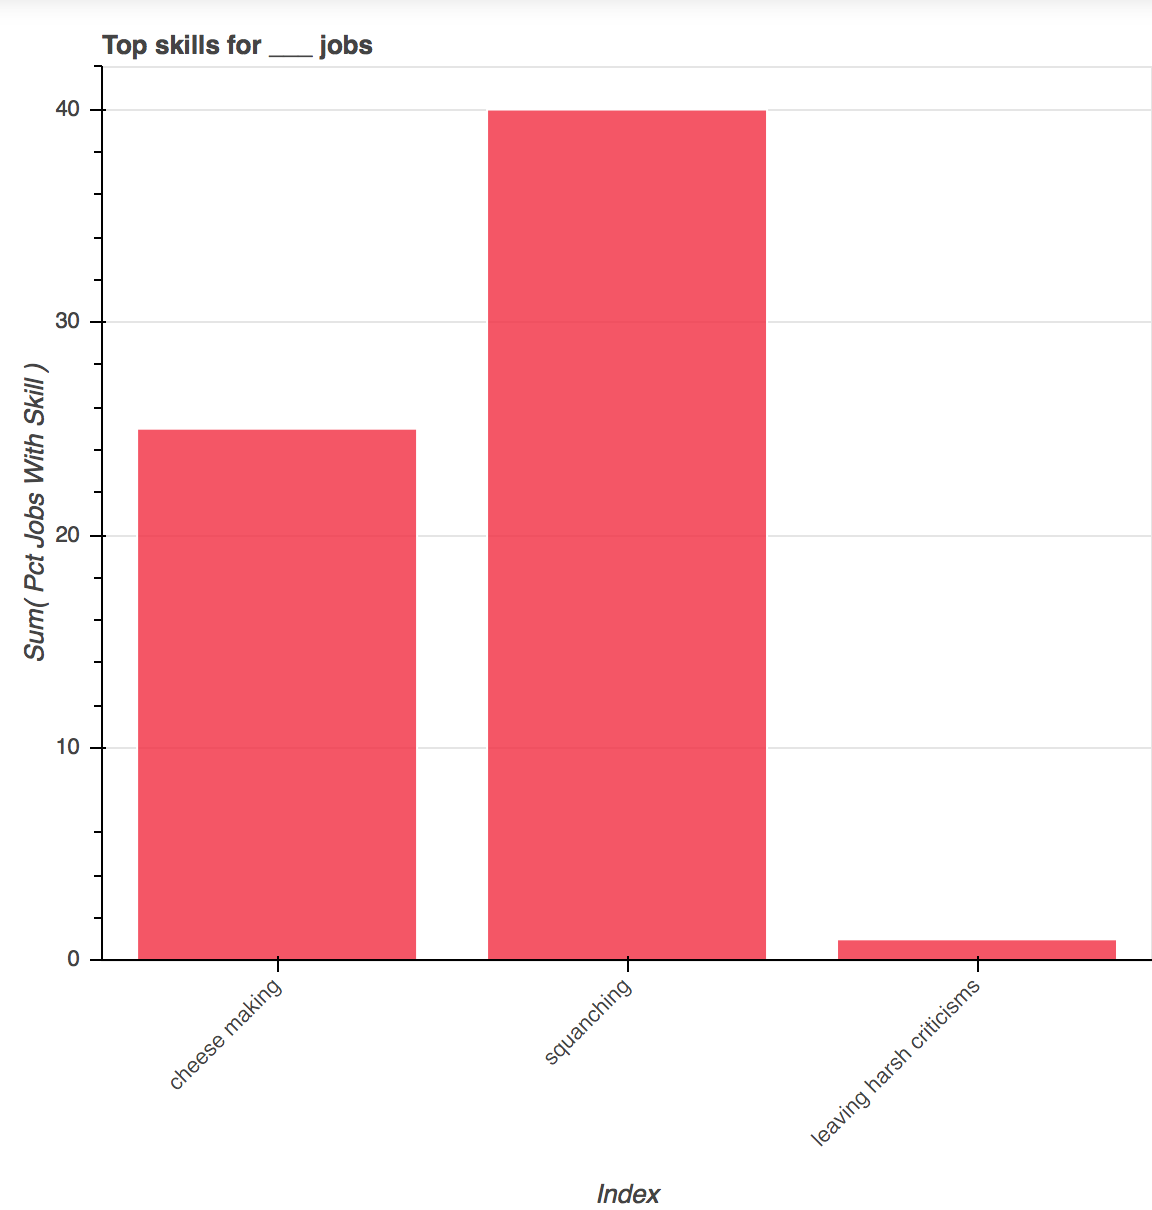

In [5]:
from IPython.core.display import Image, display
display(Image('images/bar-plot-custom-labels.png', width=600, unconfined=True))

# Slightly more involved example

In [6]:
df2 = pd.DataFrame({'applicants': [20, 10, 1, 0, 3, 37] , 'performance': [0, np.NaN, 0.5, 0.95, 0.15, 0.17 ]})

In [7]:
df2

,applicants,performance
0,20,0.00
1,10,NaN
2,1,0.50
3,0,0.95
4,3,0.15
5,37,0.17


In [8]:
bins = [-1.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
my_labels = ['Missing', '[0, 0.1)', '[0.1, 0.2)', '[0.2, 0.3)', '[0.3, 0.4)', '[0.4, 0.5)', '[0.5, 0.6)', '[0.6, 0.7)', '[0.7, 0.8)', '[0.8, 0.9)', '[0.9, 1.0)']

df2['performance'] = df2['performance'].fillna(-1.0) # fill missing data
df2['category'] = pd.cut(df2['performance'], bins, right=False, labels=False
                         , retbins=False, precision=3, include_lowest=True)
df2['applicant_pct'] = 100*df2['applicants']/df2['applicants'].sum()
df2

,applicants,performance,category,applicant_pct
0,20,0.00,1,28.169014
1,10,-1.00,0,14.084507
2,1,0.50,6,1.408451
3,0,0.95,10,0.000000
4,3,0.15,2,4.225352
5,37,0.17,2,52.112676


In [9]:
# We used the dataframe index in the previous example, in this we use the category column
new_label_dict = dict(zip(range(len(my_labels)), my_labels))
p2 = Bar(df2, 'category', values='applicant_pct', 
         agg = 'sum',
         title="Applicant Performance Scores", color='red', legend=False)
p2.xaxis[0].formatter = FixedTickFormatter(labels=new_label_dict)

show(p2)

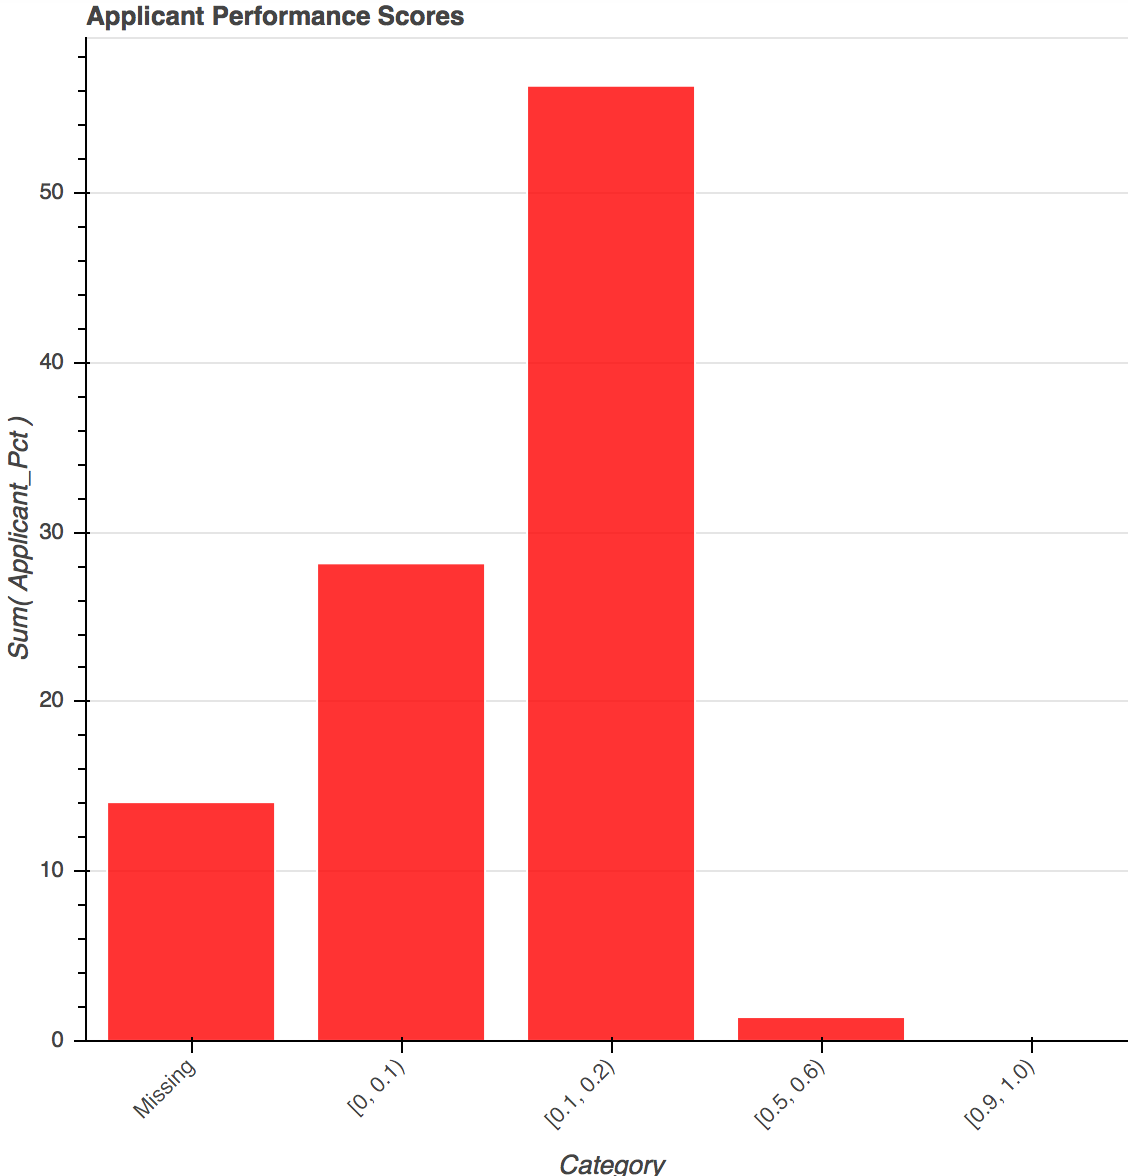

In [10]:
from IPython.core.display import Image, display
display(Image('images/bar-plot-custom-labels2.png', width=600, unconfined=True))